# Support Vector Machines

In [2]:
#Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Read the input file 'Diabetes.csv' using Pandas and check it's column names(1 Marks)

In [2]:
# looking at the first five rows to know if there are any other specific text format present in the dataset
data_set= open('diabetes.csv','r')
print('\033[1mBook file structure\033[0m\n')
for i in range(0,5):
    print(data_set.readline())

Book file structure

Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome

6,148,72,35,0,33.6,0.627,50,1

1,85,66,29,0,26.6,0.351,31,0

8,183,64,0,0,23.3,0.672,32,1

1,89,66,23,94,28.1,0.167,21,0



In [3]:
diabetes_data=pd.read_csv('diabetes.csv')
diabetes_data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
# Eye ball the imported dataset

### Check dimension of dataset

In [5]:
diabetes_data.shape

(768, 9)

### Check distribution of dependent variable, Outcome and plot it (1 Marks)

,Outcome,count,prop
0,0,500,0.651042
1,1,268,0.348958


<function matplotlib.pyplot.show(*args, **kw)>

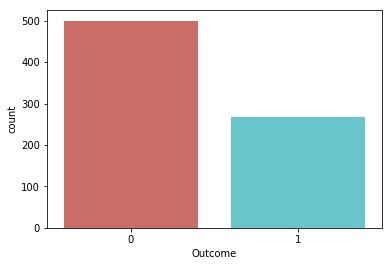

In [6]:
import seaborn as sns
from IPython.display import display
# ploting the data distribution for the target columns "Outcome", 0 means No diabete and 1 means diabetes
freq = diabetes_data['Outcome'].value_counts().to_frame()
freq.reset_index(inplace=True)
freq.columns = [freq.columns[1], 'count']
freq['prop'] = freq['count'] / sum(freq['count'])
display(freq)
sns.countplot(x='Outcome',data=diabetes_data,palette='hls')
plt.show

### Out of  768 data points, 500 are labeled as 0 and 268 as 1.
### Outcome 0 means No diabetes, outcome 1 means diabetes

In [ ]:
# Check data types and info of dataset

In [5]:
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
Pregnancies                 768 non-null int64
Glucose                     768 non-null int64
BloodPressure               768 non-null int64
SkinThickness               768 non-null int64
Insulin                     768 non-null int64
BMI                         768 non-null float64
DiabetesPedigreeFunction    768 non-null float64
Age                         768 non-null int64
Outcome                     768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


### Check data distribution using summary statistics and provide your findings(2 Marks)

In [13]:
diabetes_data.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
# Based on the description stat, we can see that there are 768 observations, there are ouliers that might exist in Insulin
# The over all range of data ranges from single digit to max of 3 digits
# Most of the features have min value of "0"
# shows the Std and IQR per features

# Will check of further detials in next steps

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]), <a list of 9 Text xticklabel objects>)

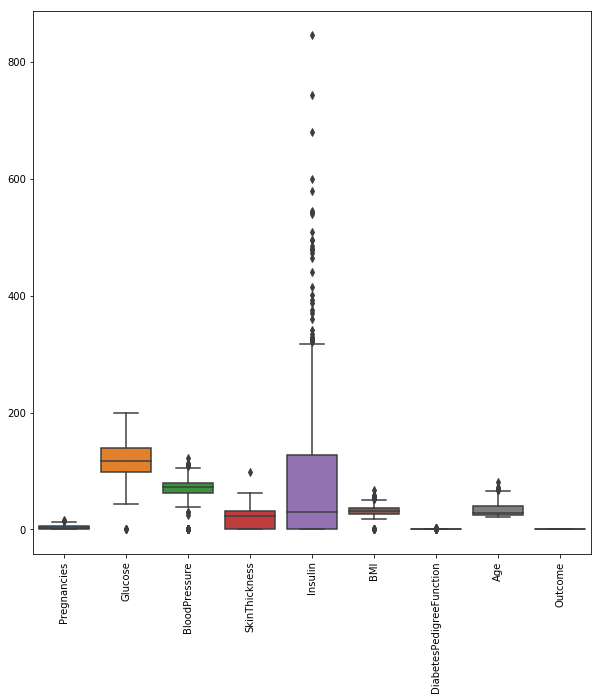

In [23]:
# Outliers
plt.figure(figsize=(10,10))
sns.boxplot( data=diabetes_data)
plt.xticks(rotation=90)

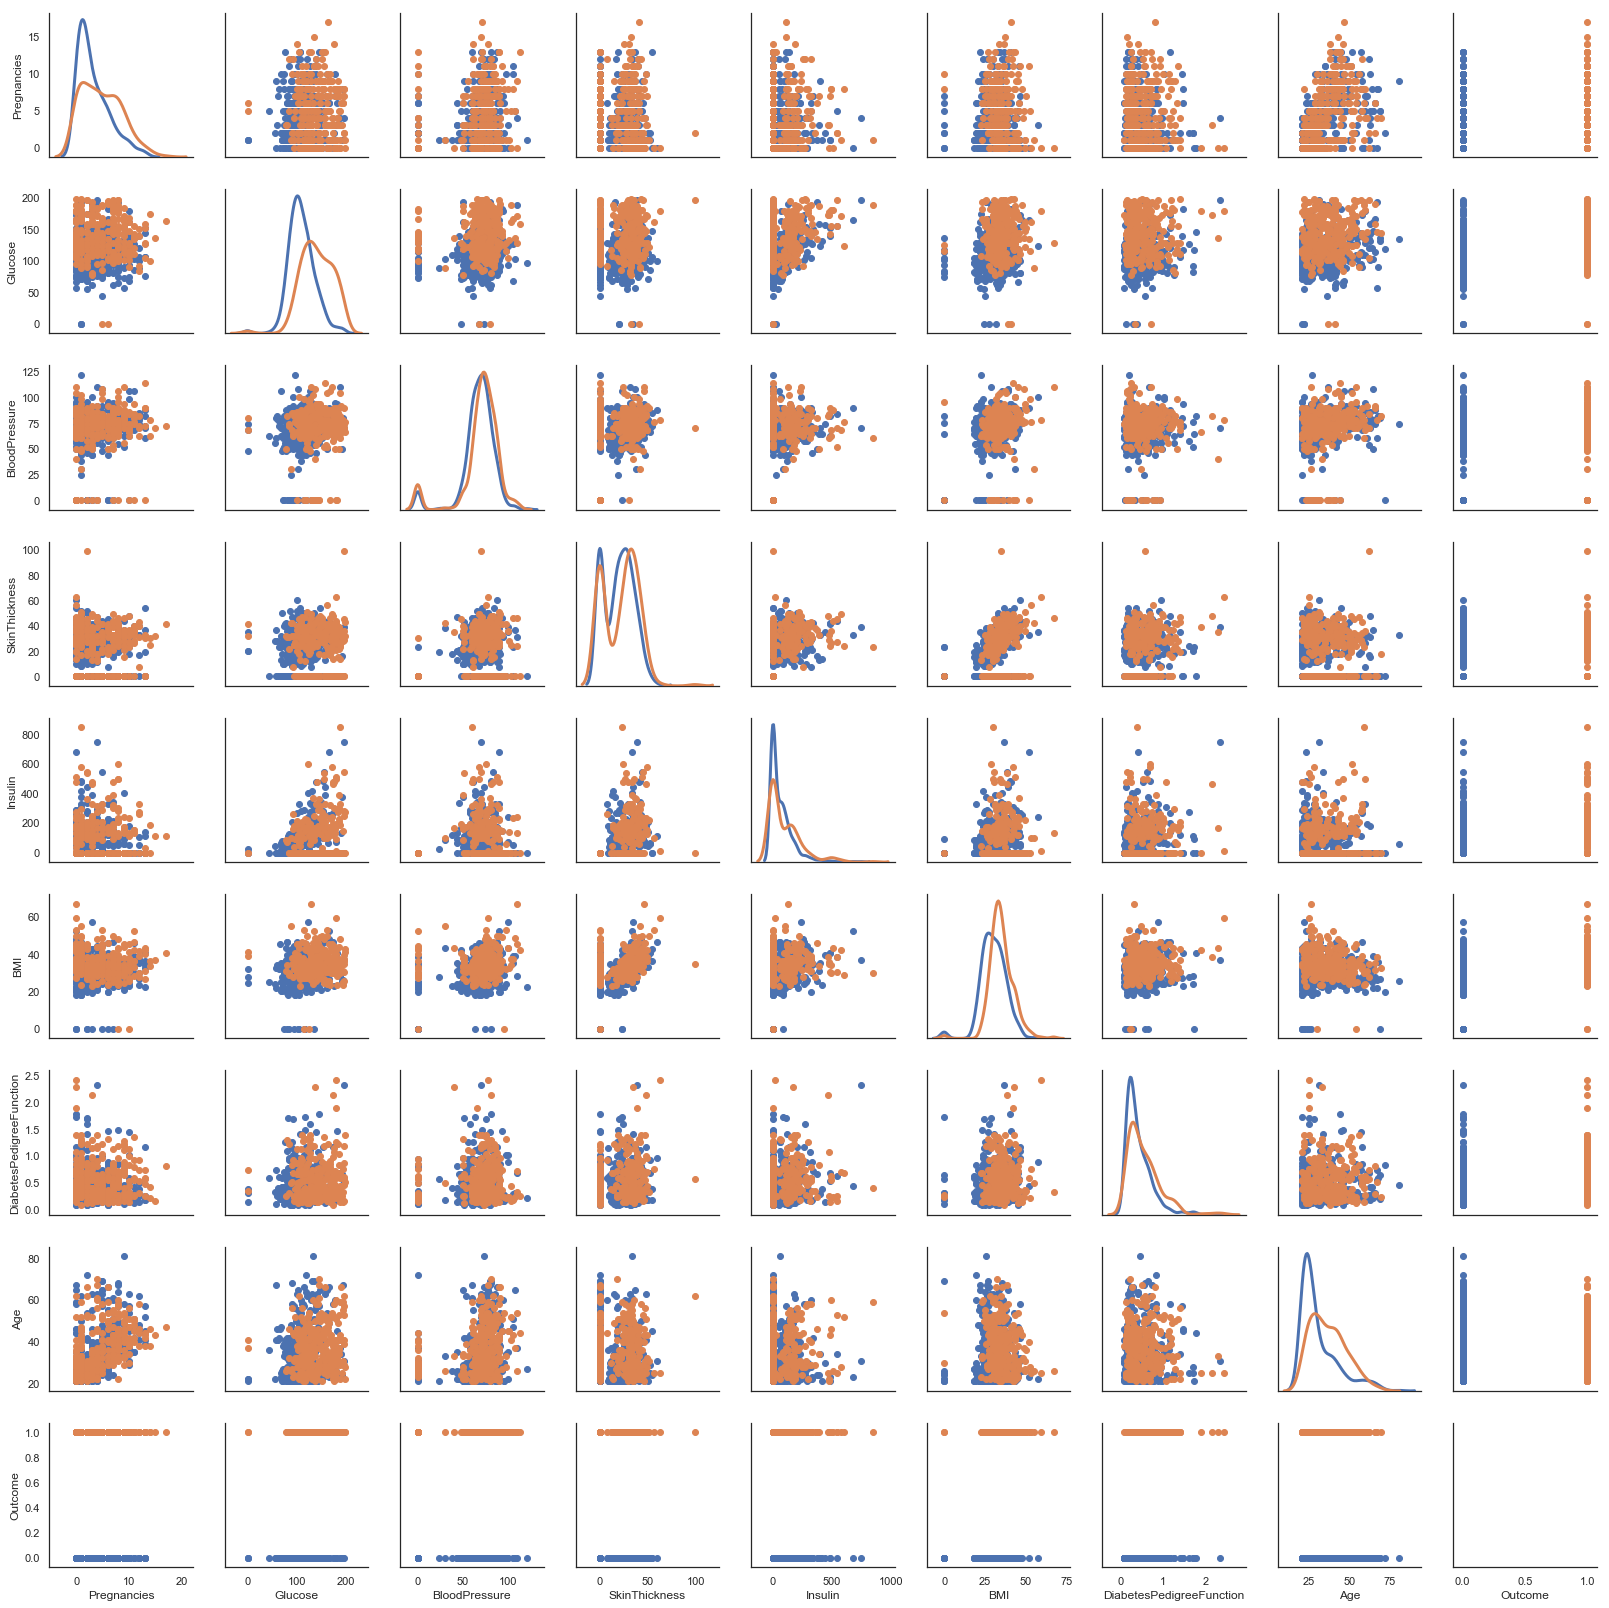

In [316]:
#Oberving the clusters and distribution with the help of pairplot/pairgrid
sns.set(style="white")
df = diabetes_data
g = sns.PairGrid(df, hue = 'Outcome',diag_sharey=False)
g.map_lower(plt.scatter)
#g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot,lw=3)

In [7]:
# From the pairplot/pairgrid plot, we can observe the following
#1) Age, Pregnancies, Glucose shows a good distribution for target variable(Outcome) compaired to other features from the diagonal kde plot
#2) At the same time, Looking at the scatter-plots, we can observe that no two attributes are able to clearly seperate the two outcome-class instances.
#3) From the scatter plot, we can also observe that there are no clear inidication of correlation. However, we will look at the correlaiton from Pd.Corr() in further steps

### Do correlation analysis and bivariate viualization with Insights(1 Marks)

In [26]:
diabetes_data.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


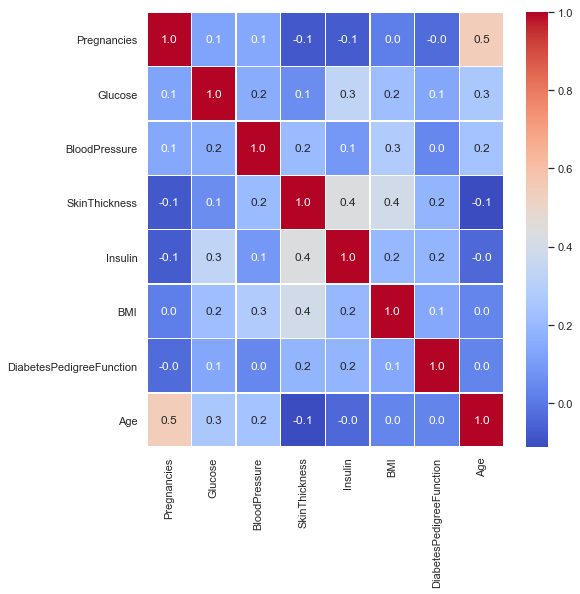

In [29]:
#correlation map
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(diabetes_data.drop(columns=['Outcome']).corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax,cmap = "coolwarm")

In [8]:
# From the Heatmap and pd.Corr(), we can observe that the features are not much correlated

#### Do train and test split with stratify sampling on Outcome variable to maintain the distribution of dependent variable(1 Marks)

from sklearn.model_selection import train_test_split

X = diabetes_data.drop(columns=['Outcome'])
y = diabetes_data['Outcome']

X_train,X_test,Y_train,Y_test = train_test_split(X,y,
                              stratify=y,
                              test_size=0.20,random_state=0)

In [8]:
from sklearn.model_selection import train_test_split
Train,Test = train_test_split(diabetes_data,
                              stratify=diabetes_data['Outcome'],
                              test_size=0.25,random_state=0)
X_train = Train.drop(columns=['Outcome'])
Y_train = Train['Outcome']
X_test = Test.drop(columns=['Outcome'])
Y_test = Test['Outcome']

In [9]:
display('X_train:',X_train.shape,'Y_train:',Y_train.shape,'X_test:',X_test.shape,'Y_test:',Y_test.shape)

'X_train:'

(576, 8)

'Y_train:'

(576,)

'X_test:'

(192, 8)

'Y_test:'

(192,)

### Train Support Vector Machine Model(1 Marks)

In [10]:
# use from sklearn.svm import SVC
from sklearn.svm import SVC

svc_model = SVC(C= .1, kernel='linear', gamma= 1)
svc_model.fit(X_train, Y_train)

SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=1, kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [11]:
y_pred=svc_model.predict(X_test)
display(svc_model.score(X_test,Y_test))

0.7708333333333334

In [30]:
# your insights

### Scale the data points using MinMaxScaler ( 1 Marks)

In [5]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

diabetes_data_scal = scaler.fit_transform(diabetes_data)
diabetes_data_scal=pd.DataFrame(diabetes_data_scal,columns=diabetes_data.columns)

#display(X_train_scal.shape,X_train_scal.head())
diabetes_data_scal.head()

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\preprocessing\data.py:334: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1.0
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0.0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1.0
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0.0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1.0


from sklearn.model_selection import train_test_split

X_scal = diabetes_data_scal.drop(columns=['Outcome'])
y_scal = diabetes_data_scal['Outcome']

X_train_scal,X_test_scal,Y_train_scal,Y_test_scal = train_test_split(X_scal,y_scal,
                              stratify=y_scal,
                              test_size=0.25,random_state=0)

In [6]:
from sklearn.model_selection import train_test_split

Train,Test = train_test_split(diabetes_data_scal,
                              stratify=diabetes_data_scal['Outcome'],
                              test_size=0.25,random_state=0)
X_train_scal = Train.drop(columns=['Outcome'])
Y_train_scal = Train['Outcome']
X_test_scal = Test.drop(columns=['Outcome'])
Y_test_scal = Test['Outcome']
display(X_train_scal.shape,Y_train_scal.shape,X_test_scal.shape,Y_test_scal.shape)

(576, 8)

(576,)

(192, 8)

(192,)

### Fit SVM Model on Scale data and give your observation( 1 Marks)

In [7]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model_1 = SVC(C=0.1, kernel='linear', gamma= 1)
svc_model_1.fit(X_train_scal, Y_train_scal)

# check the accuracy on the training set
display(svc_model_1.score(X_test_scal, Y_test_scal))

0.671875

#we can try increasing either C or gamma to fit a more complex model.

### Try improving the model accuracy using C=1000 (1 Marks)

In [16]:
# Building a Support Vector Machine on train data with C=1000 on orginal dataset
svc_model_2 = SVC(C=1000, kernel='linear', gamma= 1)
svc_model_2.fit(X_test, Y_test)

# check the accuracy on the training set
display(svc_model_2.score(X_test, Y_test))

0.8020833333333334

In [17]:
# Building a Support Vector Machine on train data with C=1000 om scaled dataset
svc_model_2 = SVC(C=1000, kernel='linear', gamma= 1)
svc_model_2.fit(X_test_scal, Y_test_scal)

# check the accuracy on the training set
display(svc_model_2.score(X_test_scal, Y_test_scal))

0.8229166666666666

### Here, increasing C allows us to improve the model, resulting in 0.8020 accuracy on Origonal and 0.823 on Scaled dataset.
### Let's try to explore different Kernel and C (Bonus for practice)

In [18]:
import multiprocessing 
from sklearn.model_selection import GridSearchCV

In [19]:
 param_grid = [    {        
     'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],        
     'C': [ 0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0 ]    } ]

In [20]:
gs = GridSearchCV(estimator=SVC(), param_grid=param_grid,scoring='accuracy', cv=10, n_jobs=multiprocessing.cpu_count())

In [26]:
gs.fit(X_train_scal, Y_train_scal) 

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False),
       fit_params=None, iid='warn', n_jobs=4,
       param_grid=[{'kernel': ['linear', 'rbf', 'poly', 'sigmoid'], 'C': [0.1, 0.2, 0.4, 0.5, 1.0, 1.5, 1.8, 2.0, 2.5, 3.0]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

In [27]:
gs.best_estimator_

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [28]:
gs.best_score_ 

0.7690972222222222

# Content Based Recommendation System

**About Book Crossing Dataset**<br>

This dataset has been compiled by Cai-Nicolas Ziegler in 2004, and it comprises of three tables for users, books and ratings. Explicit ratings are expressed on a scale from 1-10 (higher values denoting higher appreciation) and implicit rating is expressed by 0.

Reference: http://www2.informatik.uni-freiburg.de/~cziegler/BX/ 

**Objective**

This project entails building a Book Recommender System for users based on user-based and item-based collaborative filtering approaches.

#### Execute the below cell to load the datasets

In [76]:
#Loading data
books = pd.read_csv("books/books.csv", sep=";", error_bad_lines=False, encoding="latin-1")
books.columns = ['ISBN', 'bookTitle', 'bookAuthor', 'yearOfPublication', 'publisher', 'imageUrlS', 'imageUrlM', 'imageUrlL']

users = pd.read_csv('books/users.csv', sep=';', error_bad_lines=False, encoding="latin-1")
users.columns = ['userID', 'Location', 'Age']

ratings = pd.read_csv('books/ratings.csv', sep=';', error_bad_lines=False, encoding="latin-1")
ratings.columns = ['userID', 'ISBN', 'bookRating']

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.p

### Check no.of records and features given in each dataset

In [77]:
print('\033[1mNumber of observations and features in books dataset:\033[0m',books.shape,'\n\n')
display(books.info())
print('\033[1mNumber of observations and features in Users dataset:\033[0m',users.shape,'\n\n')
display(users.info())
print('\033[1mNumber of observations and features in ratings dataset:\033[0m',ratings.shape,'\n\n')
display(ratings.info())

Number of observations and features in books dataset: (271360, 8) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                 271360 non-null object
bookTitle            271360 non-null object
bookAuthor           271359 non-null object
yearOfPublication    271360 non-null object
publisher            271358 non-null object
imageUrlS            271360 non-null object
imageUrlM            271360 non-null object
imageUrlL            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


None

Number of observations and features in Users dataset: (278858, 3) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


None

Number of observations and features in ratings dataset: (1149780, 3) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


None

## Exploring books dataset

In [78]:
display(books.head(), users.head(), ratings.head())

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher,imageUrlS,imageUrlM,imageUrlL
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Drop last three columns containing image URLs which will not be required for analysis

In [79]:
books=books.iloc[0:,0:-3]

In [80]:
books.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company


**yearOfPublication**

### Check unique values of yearOfPublication


In [81]:
unique=[]
j=len(books['yearOfPublication'])
for j in range(0,j,1):
    k=books.yearOfPublication[j]
    if (k in unique)==False:
        unique.append(k)
display('Unique values in "YearOfPublication" are:\n',np.array(unique))

'Unique values in "YearOfPublication" are:\n'

array(['2002', '2001', '1991', '1999', '2000', '1993', '1996', '1988',
       '2004', '1998', '1994', '2003', '1997', '1983', '1979', '1995',
       '1982', '1985', '1992', '1986', '1978', '1980', '1952', '1987',
       '1990', '1981', '1989', '1984', '0', '1968', '1961', '1958',
       '1974', '1976', '1971', '1977', '1975', '1965', '1941', '1970',
       '1962', '1973', '1972', '1960', '1966', '1920', '1956', '1959',
       '1953', '1951', '1942', '1963', '1964', '1969', '1954', '1950',
       '1967', '2005', '1957', '1940', '1937', '1955', '1946', '1936',
       '1930', '2011', '1925', '1948', '1943', '1947', '1945', '1923',
       '2020', '1939', '1926', '1938', '2030', '1911', '1904', '1949',
       '1932', '1928', '1929', '1927', '1931', '1914', '2050', '1934',
       '1910', '1933', '1902', '1924', '1921', '1900', '2038', '2026',
       '1944', '1917', '1901', '2010', '1908', '1906', '1935', '1806',
       '2021', '2000', '1995', '1999', '2004', '2003', '1990', '1994',
       '1

As it can be seen from above that there are some incorrect entries in this field. It looks like Publisher names 'DK Publishing Inc' and 'Gallimard' have been incorrectly loaded as yearOfPublication in dataset due to some errors in csv file.

Also some of the entries are strings and same years have been entered as numbers in some places. We will try to fix these things in the coming questions.

### Check the rows having 'DK Publishing Inc' as yearOfPublication

In [82]:
books.loc[books['yearOfPublication'] == 'DK Publishing Inc']

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
209538,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...
221678,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...


### Drop the rows having `'DK Publishing Inc'` and `'Gallimard'` as `yearOfPublication`

In [83]:
books.drop(books[(books['yearOfPublication'] == 'DK Publishing Inc') | (books['yearOfPublication'] == 'Gallimard')].index,inplace = True)

In [84]:
books['yearOfPublication'].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

### Change the datatype of yearOfPublication to 'int'

In [85]:
books['yearOfPublication']=books['yearOfPublication'].astype('int64')

In [86]:
books.dtypes

ISBN                 object
bookTitle            object
bookAuthor           object
yearOfPublication     int64
publisher            object
dtype: object

### Drop NaNs in `'publisher'` column


In [87]:
display(books.isna().sum())

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            2
dtype: int64

In [88]:
books.dropna(subset=['publisher'],inplace=True)
books.isna().sum()

ISBN                 0
bookTitle            0
bookAuthor           1
yearOfPublication    0
publisher            0
dtype: int64

In [89]:
books.shape

(271355, 5)

## Exploring Users dataset

In [90]:
print(users.shape)
users.head()

(278858, 3)


,userID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


### Get all unique values in ascending order for column `Age`

In [91]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [92]:
users.isna().sum()

userID           0
Location         0
Age         110762
dtype: int64

In [93]:
users.Age.unique()

array([ nan,  18.,  17.,  61.,  26.,  14.,  25.,  19.,  46.,  55.,  32.,
        24.,  20.,  34.,  23.,  51.,  31.,  21.,  44.,  30.,  57.,  43.,
        37.,  41.,  54.,  42.,  50.,  39.,  53.,  47.,  36.,  28.,  35.,
        13.,  58.,  49.,  38.,  45.,  62.,  63.,  27.,  33.,  29.,  66.,
        40.,  15.,  60.,   0.,  79.,  22.,  16.,  65.,  59.,  48.,  72.,
        56.,  67.,   1.,  80.,  52.,  69.,  71.,  73.,  78.,   9.,  64.,
       103., 104.,  12.,  74.,  75., 231.,   3.,  76.,  83.,  68., 119.,
        11.,  77.,   2.,  70.,  93.,   8.,   7.,   4.,  81., 114., 230.,
       239.,  10.,   5., 148., 151.,   6., 101., 201.,  96.,  84.,  82.,
        90., 123., 244., 133.,  91., 128.,  94.,  85., 141., 110.,  97.,
       219.,  86., 124.,  92., 175., 172., 209., 212., 237.,  87., 162.,
       100., 156., 136.,  95.,  89., 106.,  99., 108., 210.,  88., 199.,
       147., 168., 132., 159., 186., 152., 102., 116., 200., 115., 226.,
       137., 207., 229., 138., 109., 105., 228., 18

Age column has some invalid entries like nan, 0 and very high values like 100 and above

### Values below 5 and above 90 do not make much sense for our book rating case...hence replace these by NaNs

In [94]:
users['Age']=users['Age'].map(lambda x:x if x==np.nan else (np.nan if x<5 else (np.nan if x>90 else x )))

### Replace null values in column `Age` with mean

In [95]:
mean_age=users.Age.mean()
users['Age']=users['Age'].fillna(mean_age)

### Change the datatype of `Age` to `int`

In [96]:
users.isna().sum()

userID      0
Location    0
Age         0
dtype: int64

In [97]:
users['Age']=users['Age'].astype('int64')

In [98]:
print(sorted(users.Age.unique()))

[5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90]


## Exploring the Ratings Dataset

### check the shape

In [99]:
n_users = users.shape[0]
n_books = books.shape[0]

In [100]:
ratings.head(5)

,userID,ISBN,bookRating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


### Ratings dataset should have books only which exist in our books dataset. Drop the remaining rows

In [101]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
userID        1149780 non-null int64
ISBN          1149780 non-null object
bookRating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [102]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 271355 entries, 0 to 271359
Data columns (total 5 columns):
ISBN                 271355 non-null object
bookTitle            271355 non-null object
bookAuthor           271354 non-null object
yearOfPublication    271355 non-null int64
publisher            271355 non-null object
dtypes: int64(1), object(4)
memory usage: 12.4+ MB


In [103]:
# Using join/Merge method to have Ratings dataset should have books only which exist in our books dataset
ratting_rule=pd.merge(ratings,books.dropna(),on='ISBN',how='left')
ratting_rule.dropna(inplace=True)
ratting_rule.info()
ratting_rule.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031129 entries, 0 to 1149778
Data columns (total 7 columns):
userID               1031129 non-null int64
ISBN                 1031129 non-null object
bookRating           1031129 non-null int64
bookTitle            1031129 non-null object
bookAuthor           1031129 non-null object
yearOfPublication    1031129 non-null float64
publisher            1031129 non-null object
dtypes: float64(1), int64(2), object(4)
memory usage: 62.9+ MB


userID               0
ISBN                 0
bookRating           0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
dtype: int64

### Ratings dataset should have ratings from users which exist in users dataset. Drop the remaining rows

In [104]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
userID      278858 non-null int64
Location    278858 non-null object
Age         278858 non-null int64
dtypes: int64(2), object(1)
memory usage: 6.4+ MB


In [105]:
ratting_User=pd.merge(ratting_rule,users,on='userID',how='left')
ratting_User.dropna(inplace=True)
ratting_User.info()
ratting_User.isna().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1031129 entries, 0 to 1031128
Data columns (total 9 columns):
userID               1031129 non-null int64
ISBN                 1031129 non-null object
bookRating           1031129 non-null int64
bookTitle            1031129 non-null object
bookAuthor           1031129 non-null object
yearOfPublication    1031129 non-null float64
publisher            1031129 non-null object
Location             1031129 non-null object
Age                  1031129 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 78.7+ MB


userID               0
ISBN                 0
bookRating           0
bookTitle            0
bookAuthor           0
yearOfPublication    0
publisher            0
Location             0
Age                  0
dtype: int64

### Consider only ratings from 1-10 and leave 0s in column `bookRating`

In [106]:
ratting_User=ratting_User[(ratting_User['bookRating']>0) & (ratting_User['bookRating']<11)]

### Find out which rating has been given highest number of times

In [107]:
ratting_User.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 383838 entries, 1 to 1031128
Data columns (total 9 columns):
userID               383838 non-null int64
ISBN                 383838 non-null object
bookRating           383838 non-null int64
bookTitle            383838 non-null object
bookAuthor           383838 non-null object
yearOfPublication    383838 non-null float64
publisher            383838 non-null object
Location             383838 non-null object
Age                  383838 non-null int64
dtypes: float64(1), int64(3), object(5)
memory usage: 29.3+ MB


### **Collaborative Filtering Based Recommendation Systems**

### For more accurate results only consider users who have rated atleast 100 books

In [108]:
ratting_User['Count']=ratting_User.groupby('userID')['ISBN'].count()
ratting_User=ratting_User[ratting_User['Count']>99]

### Generating ratings matrix from explicit ratings


#### Note: since NaNs cannot be handled by training algorithms, replace these by 0, which indicates absence of ratings

In [65]:
ratting_User.replace(np.nan,0,inplace=True)

In [117]:
ratting_User=ratting_User[['userID','ISBN','bookRating']].reset_index()
ratting_User.isna().sum()
ratting_User.info()
ratting_User.reset_index()
ratting_User.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 4 columns):
index         158 non-null int64
userID        158 non-null int64
ISBN          158 non-null object
bookRating    158 non-null int64
dtypes: int64(3), object(1)
memory usage: 5.0+ KB


,index,userID,ISBN,bookRating
0,2033,277627,3423124199,10
1,10560,1032,038531258X,10
2,11676,1733,037330174X,8
3,11993,1903,0151104212,10
4,12538,2041,0679743243,5


### Generate the predicted ratings using SVD with no.of singular values to be 50

In [118]:
Matrix_data_df = ratting_User.pivot(index = 'userID', columns ='ISBN', values = 'bookRating').fillna(0)
Matrix_data_df.head()

ISBN,0020198825,0028638522,0039282783,0060103132,0060254920,0060924071,0060977493,0060987049,0061097101,0062502239,...,3442437725,3442727758,3453023099,3453174518,3548250203,354835985X,3822863262,8479792302,8481301531,8495787555
userID,,,,,,,,,,,,,,,,,,,,,
1032,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1733,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1903,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2041,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [119]:
from scipy.sparse.linalg import svds
U, sigma, Vt = svds(Matrix_data_df, k = 50)

In [120]:
display(U.shape,sigma.shape,Vt.shape)

(146, 50)

(50,)

(50, 157)

In [121]:
#diag
sigma = np.diag(sigma)

In [122]:
#I also need to add the user means back to get the predicted 5-star ratings
all_user_predicted_ratings = np.dot(np.dot(U, sigma), Vt) 
preds_df = pd.DataFrame(all_user_predicted_ratings, columns = Matrix_data_df.columns)
preds_df.head()

ISBN,0020198825,0028638522,0039282783,0060103132,0060254920,0060924071,0060977493,0060987049,0061097101,0062502239,...,3442437725,3442727758,3453023099,3453174518,3548250203,354835985X,3822863262,8479792302,8481301531,8495787555
0,2.758234e-17,-1.099550e-16,5.232790e-03,1.435254e-15,-1.719351e-16,-1.865170e-15,6.927243e-17,-6.803199e-16,-1.604519e-15,2.015453e-16,...,6.498022e-17,3.513213e-16,1.888999e-16,-2.719937e-17,1.208791e-15,-3.525917e-02,-1.580933e-16,-2.767501e-17,-2.953049e-16,-1.419077e-15
1,8.046410e-33,-1.250415e-32,9.312031e-16,-2.822807e-16,1.459654e-15,-4.145711e-30,-3.325092e-32,-2.303420e-16,-3.463383e-16,-5.066753e-31,...,1.176642e-31,-4.857209e-32,-5.578767e-32,2.420912e-31,-1.490013e-30,-2.522923e-16,3.783137e-15,-1.944481e-32,1.383587e-31,4.109768e-16
2,-1.733526e-17,-5.271761e-17,-5.239012e-02,-1.708503e-15,1.151106e-16,4.326029e-16,3.511951e-17,-1.536022e-15,3.088937e-16,3.590909e-17,...,-2.155615e-16,7.803580e-17,1.462522e-16,-2.246157e-16,7.850724e-17,3.546128e-02,2.201722e-16,-2.640283e-17,-2.448095e-16,-4.574311e-16
3,6.510377e-33,-5.803131e-32,-1.336987e-16,3.524207e-17,-5.558610e-17,-3.104192e-32,1.366108e-32,-7.716551e-17,-1.110442e-16,1.901074e-32,...,-8.499110e-33,5.826556e-32,-2.697643e-32,-1.894983e-32,1.813853e-32,-1.940798e-16,1.185794e-16,-1.320621e-32,5.398321e-33,-5.556984e-17
4,7.066225e-33,-2.394938e-32,-2.348238e-16,2.772424e-17,5.178047e-17,-1.403143e-31,3.536794e-32,-4.015181e-18,1.401242e-16,9.885242e-32,...,2.738807e-33,1.956135e-32,-4.112485e-33,1.996648e-32,9.079163e-33,-2.208312e-16,1.690592e-16,1.535633e-32,2.619363e-32,4.214601e-17


### Take a particular user_id

### Lets find the recommendations for user with id `2110`

#### Note: Execute the below cells to get the variables loaded

In [123]:
userID = 2110

In [124]:
user_id = 2 #2nd row in ratings matrix and predicted matrix

### Get the predicted ratings for userID `2110` and sort them in descending order

### Create a dataframe with name `user_data` containing userID `2110` explicitly interacted books

In [67]:
user_data.head()

,userID,ISBN,bookRating
14448,2110,0060987529,7
14449,2110,0064472779,8
14450,2110,0140022651,10
14452,2110,0142302163,8
14453,2110,0151008116,5


In [68]:
user_data.shape

(103, 3)

### Combine the user_data and and corresponding book data(`book_data`) in a single dataframe with name `user_full_info`

In [70]:
book_data.shape

(103, 5)

In [71]:
book_data.head()

,ISBN,bookTitle,bookAuthor,yearOfPublication,publisher
246,0151008116,Life of Pi,Yann Martel,2002,Harcourt
904,015216250X,So You Want to Be a Wizard: The First Book in ...,Diane Duane,2001,Magic Carpet Books
1000,0064472779,All-American Girl,Meg Cabot,2003,HarperTrophy
1302,0345307674,Return of the Jedi (Star Wars),James Kahn,1983,Del Rey Books
1472,0671527215,Hitchhikers's Guide to the Galaxy,Douglas Adams,1984,Pocket


In [73]:
user_full_info.head()

,userID,ISBN,bookRating,bookTitle,bookAuthor,yearOfPublication,publisher
0,2110,0060987529,7,Confessions of an Ugly Stepsister : A Novel,Gregory Maguire,2000,Regan Books
1,2110,0064472779,8,All-American Girl,Meg Cabot,2003,HarperTrophy
2,2110,0140022651,10,Journey to the Center of the Earth,Jules Verne,1965,Penguin Books
3,2110,0142302163,8,The Ghost Sitter,Peni R. Griffin,2002,Puffin Books
4,2110,0151008116,5,Life of Pi,Yann Martel,2002,Harcourt


### Get top 10 recommendations for above given userID from the books not already rated by that user